In [1]:
import pandas as pd
dataset=pd.read_excel("Crime_Data.xlsx")

In [2]:
dataset.shape

(549999, 22)

In [3]:
dataset.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,2007-08-25 09:22:18,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,2015-08-17 15:03:40,NaN,NaN,NaN
1,25953,JE240540,2021-05-24 15:06:00,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,2021-06-26 09:24:00,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,2023-11-09 07:30:00,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549999 entries, 0 to 549998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    549999 non-null  int64         
 1   Case Number           549999 non-null  object        
 2   Date                  549999 non-null  datetime64[ns]
 3   Block                 549999 non-null  object        
 4   IUCR                  549999 non-null  object        
 5   Primary Type          549999 non-null  object        
 6   Description           549999 non-null  object        
 7   Location Description  548326 non-null  object        
 8   Arrest                549999 non-null  bool          
 9   Domestic              549999 non-null  bool          
 10  Beat                  549999 non-null  int64         
 11  District              549999 non-null  int64         
 12  Ward                  213674 non-null  float64       
 13 

In [5]:
dataset.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1673
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    336325
Community Area          334906
FBI Code                     0
X Coordinate              6912
Y Coordinate              6912
Year                         0
Updated On                   0
Latitude                  6912
Longitude                 6912
Location                  6912
dtype: int64

In [6]:
dataset["Location Description"].value_counts()

Location Description
STREET                    166056
RESIDENCE                  90195
APARTMENT                  58759
SIDEWALK                   30151
OTHER                      14865
                           ...  
CLEANERS/LAUNDROMAT            1
FUNERAL PARLOR                 1
JUNK YARD/GARBAGE DUMP         1
LIVERY AUTO                    1
LOADING DOCK                   1
Name: count, Length: 210, dtype: int64

In [7]:
dataset["Primary Type"].value_counts()

Primary Type
THEFT                                112771
BATTERY                              101006
CRIMINAL DAMAGE                       60216
ASSAULT                               40050
NARCOTICS                             39571
MOTOR VEHICLE THEFT                   37215
OTHER OFFENSE                         33893
DECEPTIVE PRACTICE                    24225
BURGLARY                              23381
ROBBERY                               21069
HOMICIDE                              13152
CRIMINAL TRESPASS                     12844
WEAPONS VIOLATION                      8664
PROSTITUTION                           4315
OFFENSE INVOLVING CHILDREN             3559
SEX OFFENSE                            2855
PUBLIC PEACE VIOLATION                 2594
CRIMINAL SEXUAL ASSAULT                1673
LIQUOR LAW VIOLATION                   1341
CRIM SEXUAL ASSAULT                    1219
ARSON                                  1156
INTERFERENCE WITH PUBLIC OFFICER        745
KIDNAPPING         

In [8]:
dataset["Location Description"]=dataset["Location Description"].fillna("OTHER")

In [9]:
dataset.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    336325
Community Area          334906
FBI Code                     0
X Coordinate              6912
Y Coordinate              6912
Year                         0
Updated On                   0
Latitude                  6912
Longitude                 6912
Location                  6912
dtype: int64

In [10]:
block_location=dataset.groupby('Block')[['X Coordinate', 'Y Coordinate', 'Latitude','Longitude']].first()

dataset['X Coordinate']=dataset['X Coordinate'].fillna(dataset['Block'].map(block_location['X Coordinate']))
dataset['Y Coordinate']=dataset['Y Coordinate'].fillna(dataset['Block'].map(block_location['Y Coordinate']))
dataset['Latitude']=dataset['Latitude'].fillna(dataset['Block'].map(block_location['Latitude']))
dataset['Longitude']=dataset['Longitude'].fillna(dataset['Block'].map(block_location['Longitude']))

In [11]:
dataset.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    336325
Community Area          334906
FBI Code                     0
X Coordinate              1477
Y Coordinate              1477
Year                         0
Updated On                   0
Latitude                  1477
Longitude                 1477
Location                  6912
dtype: int64

In [12]:
dataset = dataset.dropna(subset=["X Coordinate"])

In [13]:
dataset.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    335055
Community Area          333729
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                  5435
dtype: int64

In [14]:
# Fill missing 'Location' values with Latitude and Longitude formatted as (Latitude, Longitude)
dataset['Location'] = dataset['Location'].fillna(
    dataset.apply(lambda row: f"({row['Latitude']}, {row['Longitude']})", axis=1)
)

In [15]:
address=dataset[["ID","Block","District", "Ward","Community Area","X Coordinate","Y Coordinate","Latitude","Longitude","Location"]]
address

,ID,Block,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,5741943,074XX N ROGERS AVE,24,49.0,1.0,1163978.0,1949701.0,42.017609,-87.671933,"(42.017608579, -87.671932599)"
1,25953,020XX N LARAMIE AVE,25,36.0,19.0,1141387.0,1913179.0,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,062XX N MC CORMICK RD,17,50.0,13.0,1152781.0,1941458.0,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,019XX W BYRON ST,19,47.0,5.0,1162518.0,1925906.0,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,086XX S COTTAGE GROVE AVE,6,6.0,44.0,1183071.0,1847869.0,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...
549994,1715153,036XX S LAKE PARK AV,2,NaN,NaN,1182305.0,1881212.0,41.829265,-87.606630,"(41.829264761, -87.606629868)"
549995,1799889,065XX S STEWART AV,7,NaN,NaN,1174713.0,1861451.0,41.775211,-87.635073,"(41.775211478, -87.635073388)"
549996,1769834,031XX N CENTRAL PARK AV,14,NaN,NaN,1151878.0,1920763.0,41.938449,-87.717224,"(41.938448908, -87.717224032)"
549997,1788327,065XX S CICERO AV,8,NaN,NaN,1145544.0,1861043.0,41.774692,-87.742015,"(41.774692006, -87.742014699)"


In [16]:
ca_per_block=address.groupby("Block")["Community Area"].nunique()
ca_per_block[ca_per_block>2]

Block
026XX W MONTROSE AVE         3
094XX S COTTAGE GROVE AVE    3
Name: Community Area, dtype: int64

In [17]:
address[address["Block"]=="026XX W MONTROSE AVE"]

,ID,Block,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
2464,13208374,026XX W MONTROSE AVE,17,40.0,14.0,1157754.0,1929122.0,41.961269,-87.695400,"(41.961268608, -87.69539966)"
96884,13339110,026XX W MONTROSE AVE,17,33.0,16.0,1157759.0,1929122.0,41.961269,-87.695381,"(41.961268506, -87.695381277)"
169154,13439981,026XX W MONTROSE AVE,19,47.0,4.0,1158172.0,1929129.0,41.961279,-87.693863,"(41.961279267, -87.693862672)"


In [18]:
ward_per_ca=address.groupby("Community Area")["Ward"].nunique()
ward_per_ca[ward_per_ca>5]

Community Area
15.0    6
16.0    7
19.0    6
21.0    6
22.0    6
23.0    6
24.0    8
28.0    7
61.0    6
66.0    6
71.0    6
Name: Ward, dtype: int64

In [19]:
ca_per_ward=address.groupby("Ward")["Community Area"].nunique()
ca_per_ward[ca_per_ward>5]

Ward
2.0      8
3.0      8
4.0      8
5.0      6
6.0      7
8.0     10
9.0      7
10.0     7
11.0     8
12.0     6
14.0     6
15.0     6
17.0     6
18.0     6
20.0     9
21.0     7
23.0     8
25.0     7
27.0     7
28.0     8
30.0     8
31.0     6
32.0     7
34.0     9
36.0     9
39.0     7
40.0     7
41.0     6
Name: Community Area, dtype: int64

In [20]:
dataset.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    335055
Community Area          333729
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

In [21]:
dataset.shape

(548522, 22)

In [22]:
# droping ward and community area columns as the null values account for more than 60% of data
dataset=dataset.drop(columns=["Ward","Community Area"])

In [23]:
dataset.shape

(548522, 20)

In [24]:
dataset.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [25]:
dataset["Case Number"].duplicated().sum()


np.int64(565)

In [26]:
dataset[dataset["Case Number"].duplicated()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
13711,27852,JG499426,2023-11-10 17:16:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"
17153,27853,JG499426,2023-11-10 20:52:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"
20881,27774,JG446325,2023-10-01 15:43:00,000XX S WHIPPLE ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1124,11,01A,1156167.0,1899624.0,2023,2023-10-09 15:41:55,41.880356,-87.702033,"(41.880356034, -87.70203272)"
24587,27782,JG453003,2023-10-06 02:40:00,018XX W 54TH ST,110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,932,9,01A,1164814.0,1868881.0,2023,2024-03-25 16:29:54,41.795815,-87.671152,"(41.795815172, -87.671152128)"
30199,27275,JF528120,2022-12-30 22:20:00,086XX S CONSTANCE AVE,110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,412,4,01A,1190022.0,1848100.0,2022,2023-11-19 15:40:38,41.738220,-87.579382,"(41.738220374, -87.579382217)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340114,5098,HR411763,2009-07-05 03:00:00,012XX E 63RD ST,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,314,3,01A,1185405.0,1863477.0,2009,2022-09-19 15:41:05,41.780526,-87.595815,"(41.780526088, -87.595814598)"
340166,22240,HY551250,2015-12-27 06:05:00,059XX S WENTWORTH AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,232,2,01A,1175978.0,1865746.0,2015,2022-09-19 15:41:05,41.786969,-87.630307,"(41.786969136, -87.630307356)"
340372,21718,HY106072,2015-01-06 17:53:00,022XX E 79TH ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,414,4,01A,1192475.0,1853026.0,2015,2022-09-01 15:42:17,41.751678,-87.570235,"(41.751678423, -87.57023511)"
340702,2811,HK509310,2004-07-22 11:35:00,008XX N SPRINGFIELD AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,1112,11,01A,1150235.0,1905403.0,2004,2022-09-19 15:41:05,41.896332,-87.723664,"(41.896331896, -87.723663785)"


In [27]:
dataset[dataset["Case Number"]=='JG499426']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7115,27851,JG499426,2023-11-10 17:22:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"
13711,27852,JG499426,2023-11-10 17:16:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"
17153,27853,JG499426,2023-11-10 20:52:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"


In [28]:
dataset[dataset["Case Number"]=='JG499426']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7115,27851,JG499426,2023-11-10 17:22:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"
13711,27852,JG499426,2023-11-10 17:16:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"
17153,27853,JG499426,2023-11-10 20:52:00,083XX S PULASKI RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,834,8,01A,1151183.0,1848997.0,2023,2023-11-18 15:40:25,41.741528,-87.721657,"(41.741527505, -87.721656705)"


In [29]:
dataset = dataset.drop_duplicates(subset='Case Number', keep='first')


In [30]:
dataset["Case Number"].duplicated().sum()

np.int64(0)

In [31]:
import pymysql

mydb = pymysql.connect(
 host="localhost",
 user="root",
 password="PWsaga@31",
 database="guvi",
)

mycursor = mydb.cursor()

In [32]:
# mycursor.execute("DROP TABLE IF EXISTS guvi.crime_data;")

In [33]:
# mycursor.execute("""
#             CREATE TABLE IF NOT EXISTS crime_data (
#             ID INT NOT NULL,
#             Case_Number VARCHAR(255),
#             Date DATETIME,
#             Block VARCHAR(255),
#             IUCR VARCHAR(255),
#             Primary_Type VARCHAR(255),
#             Description VARCHAR(255),
#             Location_Description VARCHAR(255),
#             Arrest BOOLEAN,
#             Domestic BOOLEAN,
#             Beat INT,
#             District INT,
#             FBI_Code VARCHAR(255),
#             X_Coordinate FLOAT,
#             Y_Coordinate FLOAT,
#             Year INT,
#             Updated_On DATETIME,
#             Latitude FLOAT,
#             Longitude FLOAT,
#             Location VARCHAR(255),
#             PRIMARY KEY (ID)
#             );
#             """)
# mydb.commit()


In [34]:
# df = pd.DataFrame(dataset)
# print("Original Columns:", df.columns)

# df.columns = df.columns.str.replace(' ', '_')

# print("Updated Columns:", df.columns)


In [35]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Coerce invalid date to NaT (Not a Time)
# df['Updated_On'] = pd.to_datetime(df['Updated_On'], errors='coerce')

In [36]:
# insert_query = """
# INSERT INTO crime_data (
#     ID, Case_Number, Date, Block, IUCR, Primary_Type, Description, Location_Description, 
#     Arrest, Domestic, Beat, District, FBI_Code, X_Coordinate, 
#     Y_Coordinate, Year, Updated_On, Latitude, Longitude, Location
# ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
# """

# data_tuples = [tuple(x) for x in df[['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type', 
#                                       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat', 
#                                       'District', 'FBI_Code', 'X_Coordinate', 
#                                       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude', 'Location']].values]


# mycursor.executemany(insert_query, data_tuples)

# mydb.commit()

In [37]:
mycursor.execute("SELECT COUNT(*) FROM guvi.crime_data")
result = mycursor.fetchone()

row_count = result[0]

print(f"Total number of rows in 'crime_data' table: {row_count}")

Total number of rows in 'crime_data' table: 547957


In [38]:
#10 SQL queries
#1 Top 5 most reported crimes during night time
mycursor.execute("""SELECT Primary_Type, COUNT(*) as count
                    FROM guvi.crime_data
                    WHERE TIME(Date) BETWEEN '22:00:00' AND '23:59:59'
                       OR TIME(Date) BETWEEN '00:00:00' AND '05:00:00'
                    GROUP BY Primary_Type
                    ORDER BY count DESC LIMIT 5;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))


+---------------------+---------+
| Primary_Type        |   count |
|---------------------+---------|
| BATTERY             |   31412 |
| THEFT               |   21806 |
| CRIMINAL DAMAGE     |   20332 |
| MOTOR VEHICLE THEFT |   11769 |
| NARCOTICS           |    8097 |
+---------------------+---------+


In [39]:
#2 Top 3 districts where highest murders reported in the city
mycursor.execute("""SELECT District, Description, COUNT(*) AS crime_count
                    FROM guvi.crime_data
                    GROUP BY District, Description
                    HAVING Description = 'FIRST DEGREE MURDER'
                    ORDER BY crime_count DESC
                    LIMIT 3;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))


+------------+---------------------+---------------+
|   District | Description         |   crime_count |
|------------+---------------------+---------------|
|         11 | FIRST DEGREE MURDER |          1344 |
|          7 | FIRST DEGREE MURDER |          1128 |
|          6 | FIRST DEGREE MURDER |          1022 |
+------------+---------------------+---------------+


In [40]:
#3 Zonewise distribution of reported crimes
mycursor.execute("""SELECT zone, COUNT(*) AS Crime_count
                FROM (SELECT *, 
                SUBSTRING(Block, 1, 5) AS Code,
                SUBSTRING_INDEX(SUBSTRING_INDEX(Block, ' ', 2), ' ', -1) AS Zone
                FROM guvi.crime_data) AS A
                GROUP BY zone
                ORDER BY Crime_count DESC;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------+---------------+
| Zone   |   Crime_count |
|--------+---------------|
| S      |        217239 |
| W      |        169329 |
| N      |        125666 |
| E      |         35723 |
+--------+---------------+


In [41]:
#4 Most reported crimes during december nights across zones
mycursor.execute("""SELECT zone, Primary_Type, COUNT(*) AS Crime_count
                FROM (
                SELECT *, 
                SUBSTRING(Block, 1, 5) AS Code,
                SUBSTRING_INDEX(SUBSTRING_INDEX(Block, ' ', 2), ' ', -1) AS Zone
                FROM guvi.crime_data
                WHERE MONTH(Date) = '12' AND 
                (TIME(DATE) BETWEEN '21:00:00' AND '23:59:59' OR TIME(DATE) BETWEEN '00:00:00' AND '05:00:00')
                ) AS A
                GROUP BY zone, Primary_Type
                ORDER BY Crime_count DESC
                LIMIT 5;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------+-----------------+---------------+
| Zone   | Primary_Type    |   Crime_count |
|--------+-----------------+---------------|
| S      | BATTERY         |           546 |
| W      | THEFT           |           472 |
| S      | THEFT           |           434 |
| S      | CRIMINAL DAMAGE |           412 |
| W      | BATTERY         |           406 |
+--------+-----------------+---------------+


In [42]:
#5 Human trafficking case reported in E Zone 
mycursor.execute("""SELECT Date, District, Zone, Block, Primary_Type, Description, Location_Description, Arrest, Updated_On
                FROM (SELECT *, 
                SUBSTRING(Block, 1, 5) AS Code,
                SUBSTRING_INDEX(SUBSTRING_INDEX(Block, ' ', 2), ' ', -1) AS Zone
                FROM guvi.crime_data) AS A
                WHERE Zone = 'E' AND Primary_Type = 'HUMAN TRAFFICKING';
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------+------------+--------+------------------+-------------------+---------------------+------------------------+----------+---------------------+
| Date                |   District | Zone   | Block            | Primary_Type      | Description         | Location_Description   |   Arrest | Updated_On          |
|---------------------+------------+--------+------------------+-------------------+---------------------+------------------------+----------+---------------------|
| 2022-10-20 08:00:00 |          5 | E      | 008XX E 130TH PL | HUMAN TRAFFICKING | COMMERCIAL SEX ACTS | CHA APARTMENT          |        0 | 2023-05-01 15:41:04 |
+---------------------+------------+--------+------------------+-------------------+---------------------+------------------------+----------+---------------------+


In [43]:
#6 Arrested case reported in N Zone on 2024 new year 
mycursor.execute("""SELECT Date, District, Zone, Block, Primary_Type, Description, Location_Description, Arrest, Updated_On
                FROM (SELECT *, 
                SUBSTRING(Block, 1, 5) AS Code,
                SUBSTRING_INDEX(SUBSTRING_INDEX(Block, ' ', 2), ' ', -1) AS Zone
                FROM guvi.crime_data) AS A
                WHERE Zone= 'N' AND Date = '2024-01-01 00:00:00' AND Arrest = '1';
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------+------------+--------+--------------------+----------------+-------------------------+------------------------+----------+---------------------+
| Date                |   District | Zone   | Block              | Primary_Type   | Description             | Location_Description   |   Arrest | Updated_On          |
|---------------------+------------+--------+--------------------+----------------+-------------------------+------------------------+----------+---------------------|
| 2024-01-01 00:00:00 |         14 | N      | 013XX N ELSTON AVE | NARCOTICS      | FOUND SUSPECT NARCOTICS | OTHER (SPECIFY)        |        1 | 2024-03-16 15:40:18 |
+---------------------+------------+--------+--------------------+----------------+-------------------------+------------------------+----------+---------------------+


In [44]:
#7 Case reported in distict 31 with block code 0000X
mycursor.execute("""SELECT Date, District, Code, Block, Primary_Type, Description, Location_Description, Arrest, Updated_On 
                FROM (SELECT *, 
                SUBSTRING(Block, 1, 5) AS Code,
                SUBSTRING_INDEX(SUBSTRING_INDEX(Block, ' ', 2), ' ', -1) AS Zone
                FROM guvi.crime_data
                WHERE District='31') AS A
                WHERE Code= '0000X'
                ;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------+------------+--------+------------------+----------------+---------------+--------------------------------------------+----------+---------------------+
| Date                |   District | Code   | Block            | Primary_Type   | Description   | Location_Description                       |   Arrest | Updated_On          |
|---------------------+------------+--------+------------------+----------------+---------------+--------------------------------------------+----------+---------------------|
| 2023-10-10 20:30:00 |         31 | 0000X  | 0000X W OHARE ST | THEFT          | OVER $500     | AIRPORT TERMINAL UPPER LEVEL - SECURE AREA |        0 | 2023-10-18 15:42:30 |
| 2023-11-01 09:50:00 |         31 | 0000X  | 0000X W OHARE ST | BATTERY        | SIMPLE        | AIRPORT TERMINAL UPPER LEVEL - SECURE AREA |        0 | 2023-11-09 15:40:40 |
+---------------------+------------+--------+------------------+----------------+---------------+-----------------------

In [45]:
#8 The only domestic violence case reported in the city
mycursor.execute("""SELECT Date, Block, Primary_Type, Location_Description, District, Arrest, Updated_On 
                FROM guvi.crime_data
                WHERE Primary_Type = "Domestic Violence"
                ;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------+---------------------+-------------------+------------------------+------------+----------+---------------------+
| Date                | Block               | Primary_Type      | Location_Description   |   District |   Arrest | Updated_On          |
|---------------------+---------------------+-------------------+------------------------+------------+----------+---------------------|
| 2001-01-11 02:30:41 | 087XX S ESCANABA AV | DOMESTIC VIOLENCE | APARTMENT              |          4 |        1 | 2015-08-17 15:03:40 |
+---------------------+---------------------+-------------------+------------------------+------------+----------+---------------------+


In [46]:
#9 Location having highest narcotics related crime
mycursor.execute("""SELECT District, Zone, Block, Primary_Type, COUNT(*) AS Crime_count
                FROM (SELECT *, 
                SUBSTRING(Block, 1, 5) AS Code,
                SUBSTRING_INDEX(SUBSTRING_INDEX(Block, ' ', 2), ' ', -1) AS Zone
                FROM guvi.crime_data) AS A
                GROUP BY District, Zone, Block, Primary_Type
                HAVING Primary_Type = "NARCOTICS"
                ORDER BY Crime_count DESC
                LIMIT 1;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+------------+--------+--------------------+----------------+---------------+
|   District | Zone   | Block              | Primary_Type   |   Crime_count |
|------------+--------+--------------------+----------------+---------------|
|          2 | S      | 035XX S FEDERAL ST | NARCOTICS      |           496 |
+------------+--------+--------------------+----------------+---------------+


In [47]:
#10 Kidnapping case in district 1
mycursor.execute("""SELECT Date, District, Zone, Block, Primary_Type, Location_Description, Arrest, Updated_On 
                FROM (SELECT *, 
                SUBSTRING(Block, 1, 5) AS Code,
                SUBSTRING_INDEX(SUBSTRING_INDEX(Block, ' ', 2), ' ', -1) AS Zone
                FROM guvi.crime_data) AS A
                WHERE Primary_Type = "KIDNAPPING" AND District= '1'
                ;
                """)

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------+------------+--------+-------------------------+----------------+------------------------+----------+---------------------+
| Date                |   District | Zone   | Block                   | Primary_Type   | Location_Description   |   Arrest | Updated_On          |
|---------------------+------------+--------+-------------------------+----------------+------------------------+----------+---------------------|
| 2001-06-15 23:15:00 |          1 | N      | 001XX N STATE ST        | KIDNAPPING     | CTA TRAIN              |        0 | 2015-08-17 15:03:40 |
| 2023-05-01 22:00:00 |          1 | S      | 013XX S LAKE SHORE DR E | KIDNAPPING     | VEHICLE NON-COMMERCIAL |        0 | 2023-12-09 15:41:24 |
| 2024-02-16 16:45:00 |          1 | N      | 001XX N STATE ST        | KIDNAPPING     | DEPARTMENT STORE       |        0 | 2024-02-24 15:41:31 |
+---------------------+------------+--------+-------------------------+----------------+------------------------+-----

In [48]:
yearly_crimes = dataset["Year"].value_counts()
print(yearly_crimes)

Year
2001    335749
2024    100311
2023     89123
2022      4221
2021      1999
2020      1665
2016      1104
2018      1095
2017      1033
2002       994
2019       971
2003       893
2008       829
2009       787
2015       786
2005       747
2006       746
2012       728
2004       720
2007       716
2010       693
2014       691
2013       689
2011       667
Name: count, dtype: int64


In [49]:
district_crimes = dataset["District"].value_counts()
print(district_crimes)

District
8     35822
2     35132
11    30691
25    30408
6     30101
12    29942
4     29154
3     27735
7     27293
19    26680
9     26246
18    25842
14    23323
5     22694
10    22664
1     21336
15    21127
16    18625
24    18421
22    16767
17    16553
20    11389
31       12
Name: count, dtype: int64


In [50]:
prtp_crimes = dataset["Primary Type"].value_counts()
print(prtp_crimes)

Primary Type
THEFT                                112353
BATTERY                              100788
CRIMINAL DAMAGE                       60082
ASSAULT                               39977
NARCOTICS                             39443
MOTOR VEHICLE THEFT                   37120
OTHER OFFENSE                         33845
DECEPTIVE PRACTICE                    24095
BURGLARY                              23351
ROBBERY                               21005
CRIMINAL TRESPASS                     12814
HOMICIDE                              12585
WEAPONS VIOLATION                      8652
PROSTITUTION                           4311
OFFENSE INVOLVING CHILDREN             3543
SEX OFFENSE                            2833
PUBLIC PEACE VIOLATION                 2584
CRIMINAL SEXUAL ASSAULT                1666
LIQUOR LAW VIOLATION                   1324
CRIM SEXUAL ASSAULT                    1208
ARSON                                  1152
INTERFERENCE WITH PUBLIC OFFICER        744
KIDNAPPING         

In [51]:
des_crimes = dataset["Description"].value_counts()
print(des_crimes)

Description
SIMPLE                            95035
$500 AND UNDER                    57852
OVER $500                         37403
TO VEHICLE                        31599
TO PROPERTY                       28284
                                  ...  
REGISTER OF SALES BY DEALER           1
DOMESTIC VIOLENCE                     1
OTHER ARSON/EXPLOSIVE INCIDENT        1
OVER $300                             1
BOLITA OR BOLI PUL/RUNNER             1
Name: count, Length: 449, dtype: int64


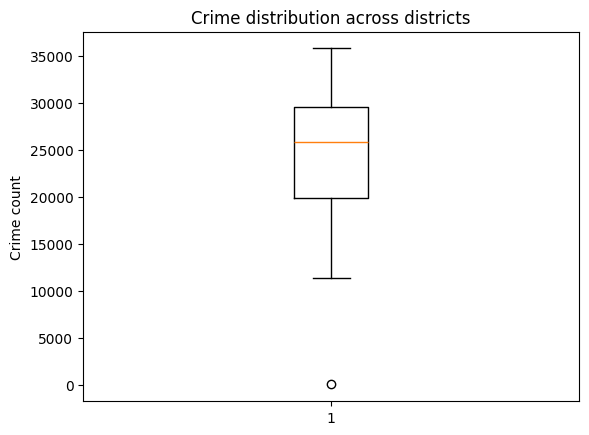

In [69]:
# #10 charts
#1 crime distribution across districts

import matplotlib.pyplot as plt
plt.boxplot(district_crimes)

plt.title("Crime distribution across districts")
plt.ylabel("Crime count")

plt.show()

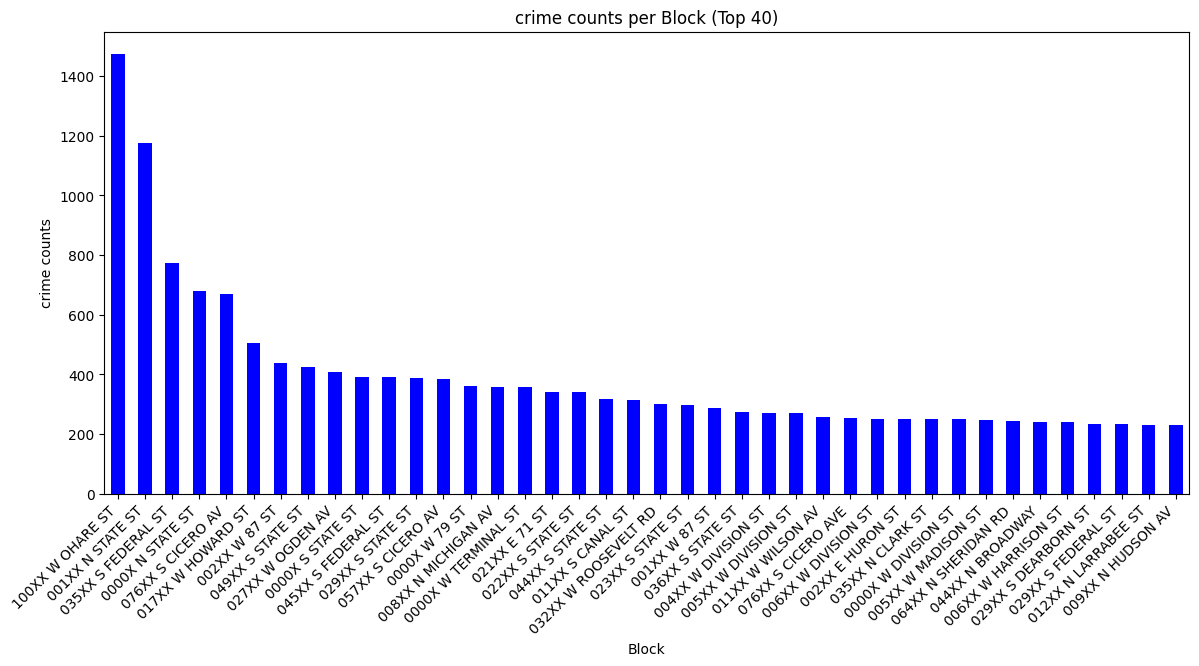

In [70]:
#2 Bar chart of crime distribution across blocks
block_counts = dataset['Block'].value_counts()

top_n = 40  
block_counts = block_counts.head(top_n)

plt.figure(figsize=(14, 6))  
block_counts.plot(kind='bar', color='blue')
plt.title('crime counts per Block (Top {})'.format(top_n))
plt.xlabel('Block')
plt.ylabel('crime counts')
plt.xticks(rotation=45, ha='right')  
plt.show()

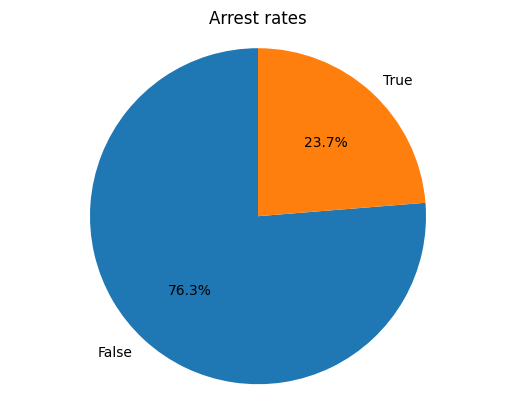

In [71]:
#3 overall Arrest rates  

Arrest_counts=dataset['Arrest'].value_counts()

plt.pie( Arrest_counts,labels=Arrest_counts.index, autopct='%1.1f%%',  startangle=90)
plt.title('Arrest rates')
plt.axis('equal')
plt.show()

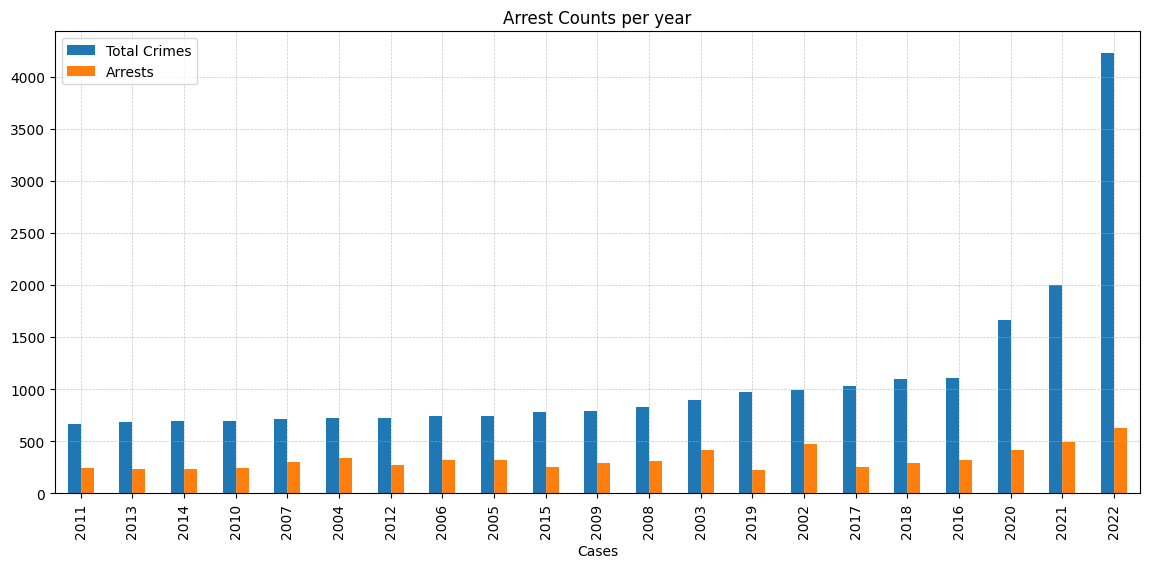

In [72]:
# 4 crime trends and arrest rates over the years
dataset_filter=dataset[~dataset['Year'].isin([2001,2023,2024])]

year_cases =  dataset_filter.groupby('Year').size() 
arrest_cases = dataset_filter[dataset_filter['Arrest'] == True]['Year'].value_counts()  

df_year = pd.DataFrame({'Total Crimes': year_cases, 'Arrests': arrest_cases})

df_year_sorted = df_year.sort_values(by= 'Total Crimes')

#df_year.plot(kind='bar', figsize=(14, 6))
df_year_sorted.plot(kind='bar', figsize=(14, 6))

plt.title('Arrest Counts per year')
plt.xlabel('Cases')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(['Total Crimes', 'Arrests'])

plt.show()

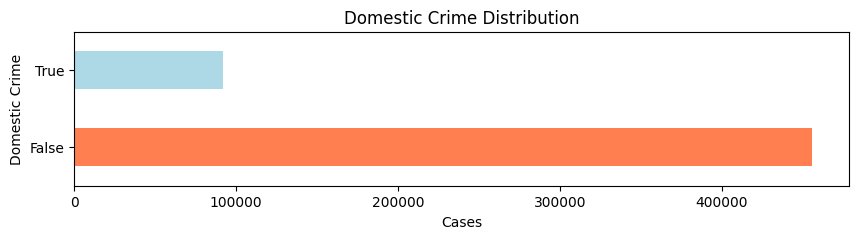

In [73]:
# 5 Domestic crime incidents
domestic_counts=dataset['Domestic'].value_counts()

domestic_counts.plot(kind='barh', color=['coral', 'lightblue'], figsize=(10, 2))
plt.xlabel('Cases')
plt.ylabel('Domestic Crime')
plt.title('Domestic Crime Distribution')
plt.show()


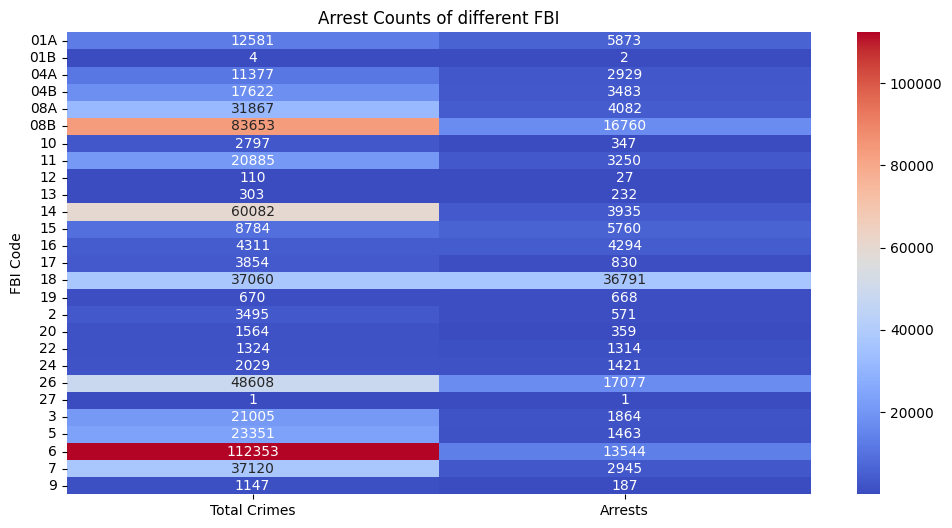

In [74]:
# 6 FBI crime incidents and arrest rates 
import seaborn as sns
dataset['FBI Code'] = dataset['FBI Code'].astype(str)

fbi_cases = dataset.groupby('FBI Code').size()  
arrested = dataset[dataset['Arrest'] == True]['FBI Code'].value_counts()  

df_fbi = pd.DataFrame({'Total Crimes': fbi_cases, 'Arrests': arrested})

plt.figure(figsize=(12, 6))
sns.heatmap(df_fbi, annot=True, cmap="coolwarm", fmt="g")

plt.title('Arrest Counts of different FBI')
plt.ylabel('FBI Code')
plt.show()


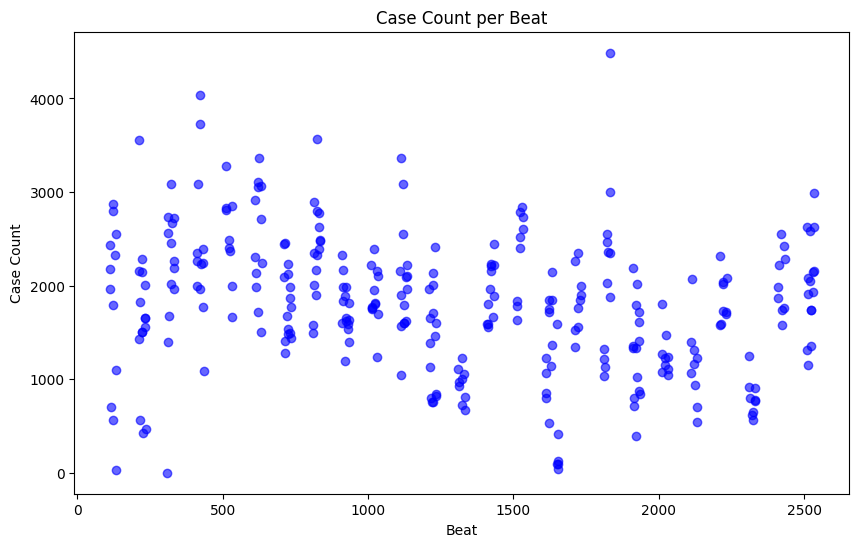

In [75]:
# 7 Scatter plot of crime incidents per beat
beat_counts = dataset['Beat'].value_counts()

plt.figure(figsize=(10, 6))  

plt.scatter(beat_counts.index, beat_counts.values, color='blue', alpha=0.6)

plt.xlabel('Beat')
plt.ylabel('Case Count')
plt.title('Case Count per Beat')

plt.show()


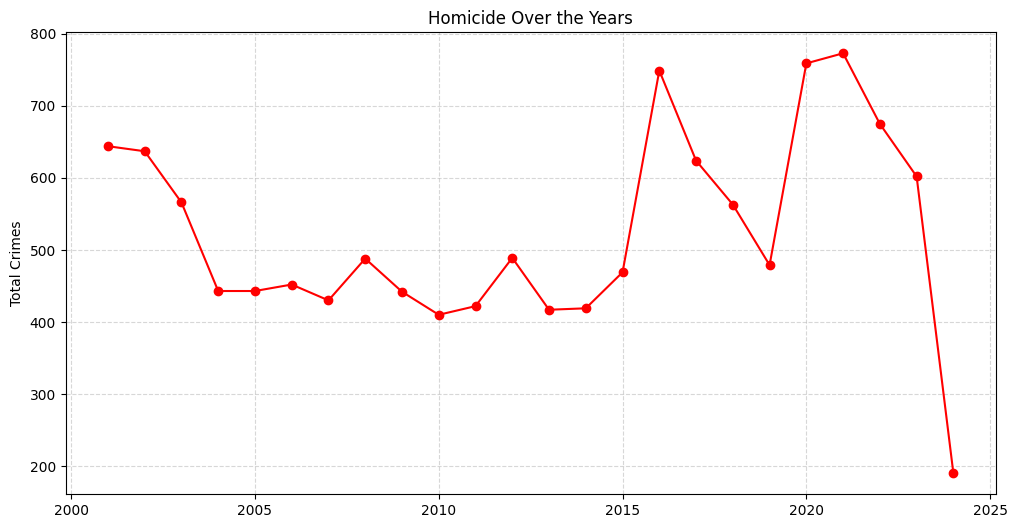

In [76]:
# 8 Homicide cases over the years

dataset_homicide= dataset[dataset['Primary Type']=='HOMICIDE']

crime_trend = dataset_homicide['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-', color='red')

plt.ylabel('Total Crimes')
plt.title('Homicide Over the Years')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


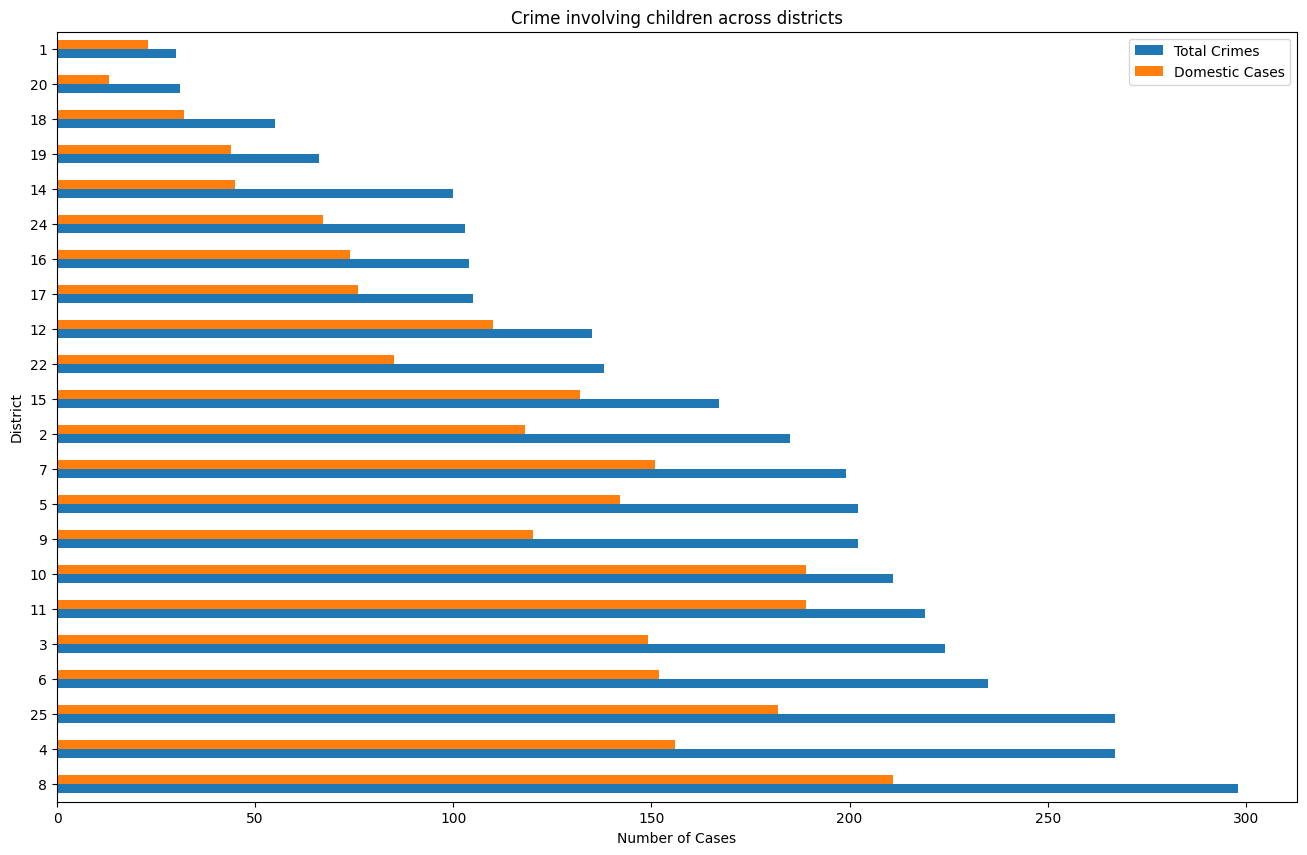

In [77]:
# 9 crime involving children across districts
df_new = dataset[dataset['Primary Type'] == 'OFFENSE INVOLVING CHILDREN']

d_counts = df_new['District'].value_counts()
domestic_count = df_new[df_new['Domestic'] == True]['District'].value_counts()

df_offence = pd.DataFrame({'Total Crimes': d_counts, 'Domestic Cases': domestic_count})

df_offence['Domestic Cases'] = df_offence['Domestic Cases'].fillna(0)

df_offence = df_offence.sort_values(by='Total Crimes', ascending=False)

df_offence.plot(kind='barh', figsize=(16, 10))

plt.xlabel('Number of Cases')
plt.ylabel('District')
plt.title('Crime involving children across districts')

plt.show()

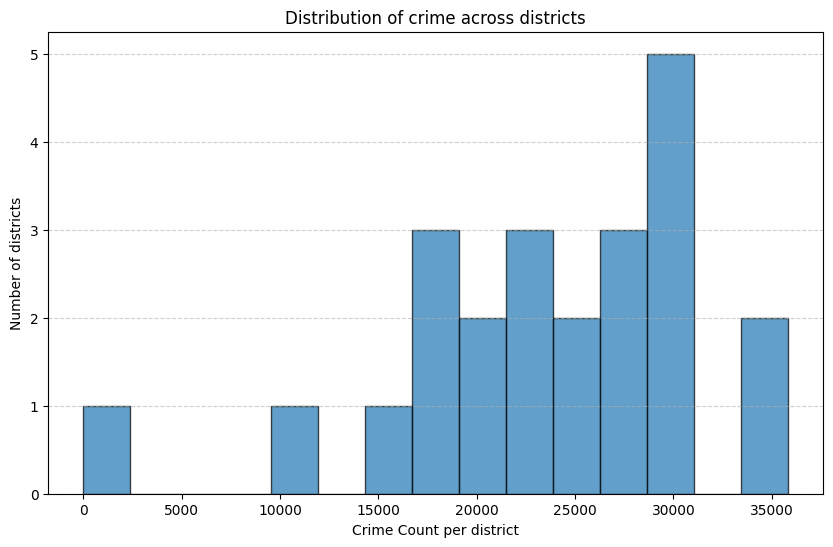

In [78]:
# 10 Histogram of crime distribution
block_crime_counts = dataset["District"].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(block_crime_counts.values, bins=15, edgecolor="black", alpha=0.7)

plt.xlabel("Crime Count per district")
plt.ylabel("Number of districts")
plt.title("Distribution of crime across districts")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()
